In [2]:
import sympy as sp
import math
import ipysheet
from sympy import sin ,cos ,N ,pi
from math import radians ,prod
from ipysheet import sheet,cell,row,column,cell_range

joint = 3
sp.init_printing()
sheet1 = sheet(rows = joint, columns=4 ,editable = True)

cellA = list()
cellB = list()
cellC = list()
cellD = list()
i = 1
while i<=joint:
    cellA.append(cell(i-1,0,"theta"+str(i)))
    cellB.append(cell(i-1,1,"alpha"+str(i)))
    cellC.append(cell(i-1,2,"r"+str(i)))
    cellD.append(cell(i-1,3,"d"+str(i)))
    i=i+1
    
display(sheet1)

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='text', value='theta1'), Cell(col…

In [2]:
!pip list

Package                       Version
----------------------------- ----------
accelerate                    0.32.1
aiohttp                       3.9.5
aiosignal                     1.3.1
anaconda-anon-usage           0.4.3
anaconda-client               1.11.2
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
archspec                      0.2.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
async-timeout                 4.0.3
attrs                         22.1.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
beautifulsoup4                4.12.2
bleach                        4.1.0
boltons                       23.0.0
brotlipy                      0.7.0
certifi                       2023.11.17
cffi 

## DH-Matrix example for 6-DOF surgical arm

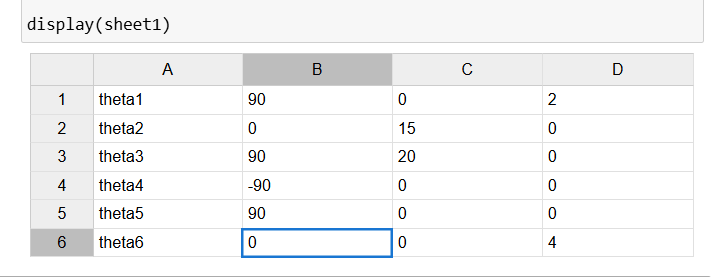

homogen_0_1 ( Stored in dh_mat[0] )


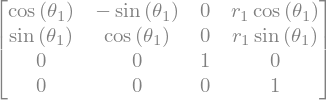



homogen_1_2 ( Stored in dh_mat[1] )


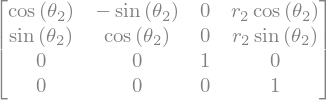



homogen_2_3 ( Stored in dh_mat[2] )


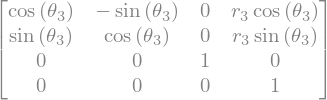

In [3]:
dh_mat = list()
i = 1
while i<=joint:
    ## Extract valuse from each Row (Compute the transformation matrix)
    t = sp.symbols(cellA[i-1].value)
    a = sp.symbols(cellB[i-1].value)
    r = sp.symbols(cellC[i-1].value)
    d = sp.symbols(cellD[i-1].value)
    tmp_mat = sp.Matrix([[cos(t) ,-sin(t)*cos(a) , sin(t)*sin(a) ,r*cos(t)],  ## THIS FORMAT WAS COLLECTED FROM INTERNET
                         [sin(t) , cos(t)*cos(a) ,-cos(t)*sin(a) ,r*sin(t)],  ## Visualized using processing sketch:
                         [  0    ,      sin(a)   ,      cos(a)   ,   d    ],
                         [  0    ,         0     ,        0      ,   1    ]])
    
    #tmp_mat = sp.Matrix([[cos(t)        ,    -sin(t)    ,     0      ,   r     ],   ## THIS FORMET COLLECTED FROM TEXT-BOOK
    #                     [sin(t)*cos(a) , cos(t)*cos(a) ,  -sin(a)   ,-d*sin(a)],
    #                     [sin(t)*sin(a) , cos(t)*sin(a) ,   cos(a)   , d*cos(a)],
    #                     [  0           ,       0       ,      0     ,   1     ]])
    
    
    ## Substitution for cell A (covert degree to radians)
    if cellA[i-1].value != 'theta'+str(i):
        t_rad = radians(float(cellA[i-1].value))
        multi_of_pi_by_four = t_rad*4/radians(180)  ## multiple of pi/4
        remainder_ = (t_rad*4/radians(180)%1)       ## To extract the fractionl part 
        if remainder_<1e-16:
            t_rad = multi_of_pi_by_four*pi/4
        
        tmp_mat = tmp_mat.subs(t,t_rad)
    
    ## Substitution for cell B (covert degree to radians)
    if cellB[i-1].value != 'alpha'+str(i):
        t_rad = radians(float(cellB[i-1].value))
        multi_of_pi_by_four = t_rad*4/radians(180)  ## multiple of pi/4
        remainder_ = (t_rad*4/radians(180)%1)       ## To extract the fractionl part 
        if remainder_<1e-16:
            t_rad = multi_of_pi_by_four*pi/4
        
        tmp_mat = tmp_mat.subs(a,t_rad)
        
    if cellC[i-1].value != 'r'+str(i):
        tmp_mat = tmp_mat.subs(r,float(cellC[i-1].value))
        
    if cellD[i-1].value != 'd'+str(i):
        tmp_mat = tmp_mat.subs(d,float(cellD[i-1].value))
    
    dh_mat.append(tmp_mat)
    print("homogen_"+str(i-1)+"_"+str(i)+" ( Stored in dh_mat["+str(i-1)+"] )")
    display(dh_mat[i-1])
    print("\n")
    i=i+1


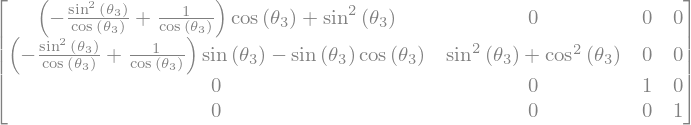

In [5]:
dh_mat[2]*(dh_mat[2].inv())  ##test

In [13]:
print("End Effector postion(w.r.t Base coordinate)\n\n")

print("NOTE: The rotational matrix is by default kept as an identity matrix")
print("      Because we assumed that the orientation of the end-effector is kept parallel to base coordinate\n ")
## Editable end effector matrix
sheet2 = sheet(rows = 4, columns=4 ,editable = True)
colA = [1,0,0,0]
colB = [0,1,0,0]
colC = [0,0,1,0]
colD = ['x','y','z',1]

i=0
while i<4:
    colA[i] = cell(i,0,colA[i])
    colB[i] = cell(i,1,colB[i])
    colC[i] = cell(i,2,colC[i])
    colD[i] = cell(i,3,colD[i])
    i=i+1

sheet2

End Effector postion(w.r.t Base coordinate)


NOTE: The rotational matrix is by default kept as an identity matrix
      Because we assumed that the orientation of the end-effector is kept parallel to base coordinate
 


Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='numeric', value=1), Cell(column_…

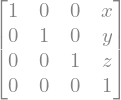

In [14]:

final_pos_mat=sp.Matrix([[colA[0].value,colB[0].value,colC[0].value,colD[0].value],
                         [colA[1].value,colB[1].value,colC[1].value,colD[1].value],
                         [colA[2].value,colB[2].value,colC[2].value,colD[2].value],
                         [colA[3].value,colB[3].value,colC[3].value,colD[3].value]])
display(final_pos_mat)

Now extract the variables from the matrix pairs bellow:



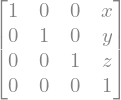

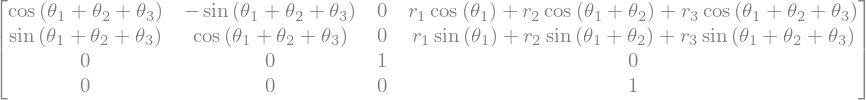

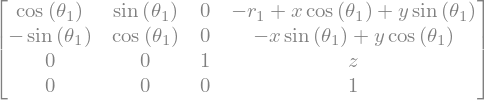

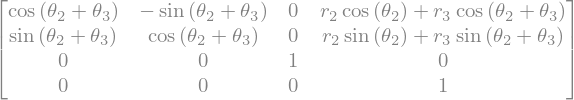

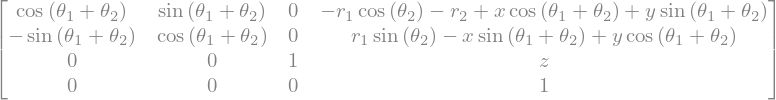

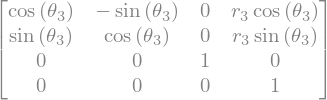

In [15]:
print("Now extract the variables from the matrix pairs bellow:\n")

# Initiation for sequential inverse matrix multiplication 
tmp_LHS_mat = list()
tmp_RHS_mat = list()
tmp_LHS_mat.append(final_pos_mat)
tmp_RHS_mat.append(sp.trigsimp(prod(dh_mat)))

display(tmp_LHS_mat[0])
display(tmp_RHS_mat[0])
print("\n")

i = 0
while i<(joint-1):
    
    tmp_LHS_mat.insert(0,dh_mat[i].inv())
    tmp_RHS_mat.insert(0,dh_mat[i].inv())
    
    display(sp.trigsimp(prod(tmp_LHS_mat)))
    display(sp.trigsimp(prod(tmp_RHS_mat)))
    print("\n")
    i = i+1
    

# Now do your own necessary calculations !

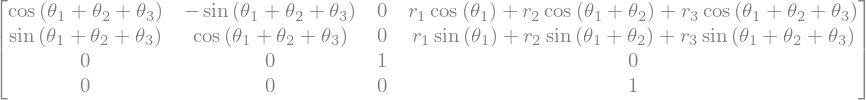

In [10]:
sp.trigsimp(dh_mat[0]*dh_mat[1]*dh_mat[2])

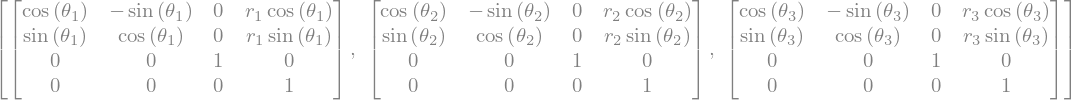

In [11]:
dh_mat

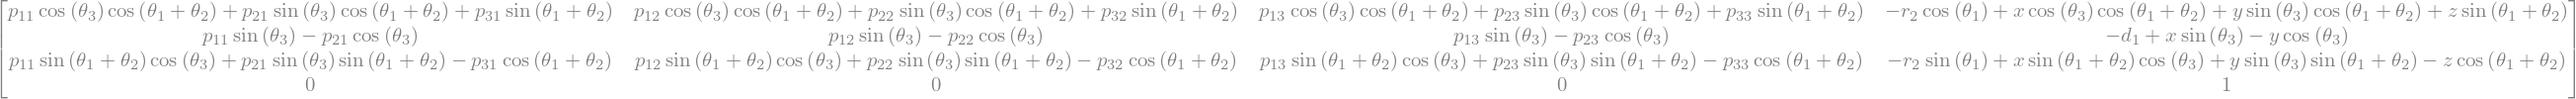

In [59]:
homo_3_6_LHS = sp.trigsimp(dh_mat[0].inv()*dh_mat[1].inv()*dh_mat[2].inv()*final_pos_mat)
display(homo_3_6_LHS)

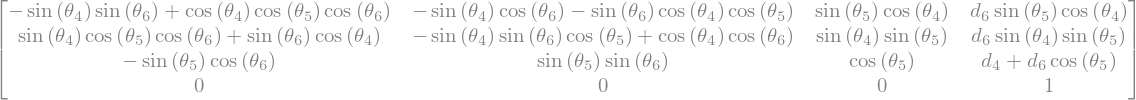

In [58]:
homo_3_6_RHS = sp.trigsimp(dh_mat[3]*dh_mat[4]*dh_mat[5])
display(homo_3_6_RHS)

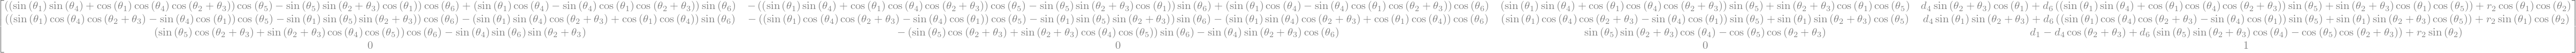

In [60]:
m= sp.trigsimp(prod(dh_mat))
display(m);

In [51]:
t1 = sp.symbols('theta1')
t2 = sp.symbols('theta2')
t3 = sp.symbols('theta3')
t4 = sp.symbols('theta4')
t5 = sp.symbols('theta5')
t6 = sp.symbols('theta6')

In [61]:
m=m.subs(t1,1.1071488)
m=m.subs(t2,-1.2875142)
m=m.subs(t3,2.5750284)
m=m.subs(t4,0.0)
m=m.subs(t5,1.8540784)
m=m.subs(t6,2.0344439 )

In [62]:
m = m.subs(sp.symbols('d1'),2)
m = m.subs(sp.symbols('r2'),8)
m = m.subs(sp.symbols('d4'),8)
m = m.subs(sp.symbols('d6'),2)

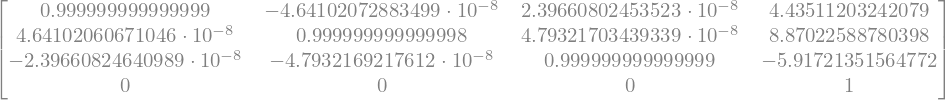

In [63]:
m